In [2]:
# 계산에 필요한 모듈불러오기
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

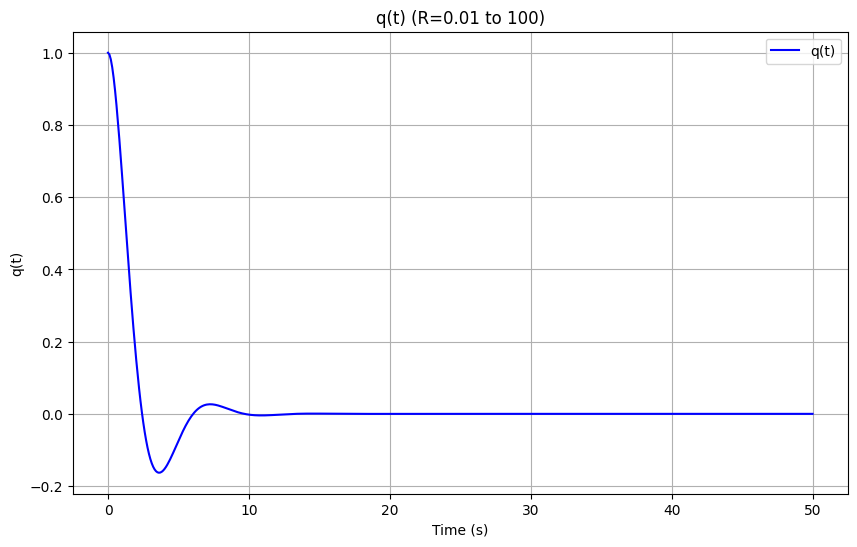

In [ ]:
# 파라미터 설정
L = 1.0  # 인덕턴스 (H)
C = 1.0  # 커패시턴스 (F)
R_values = 1.0  # 저항 (Ω) 예시 값 설정

# 미분 방정식 정의
def model(y, t, L, R, C):
    q, dqdt = y
    dydt = [dqdt, -(R / L) * dqdt - (1 / (L * C)) * q]
    return dydt

# 초기 조건 설정 (예: 초기 전하와 초기 속도)
y0 = [1.0, 0.0]  # 초기 전하량 q(0) = 1.0, 초기 속도 dq/dt(0) = 0.0

# 시간 범위 설정
t = np.linspace(0, 50, 500)  # 0초부터 50초까지 500개의 시간 점

# 미분 방정식 풀이
solution = odeint(model, y0, t, args=(L, R, C))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='q(t)', color='blue')
plt.title(f'q(t) (R=0.01 to 100)')
plt.xlabel('Time (s)')
plt.ylabel('q(t)')
plt.grid(True)
plt.legend()
plt.show()
